In [1]:
import numpy as np 
import pandas as pd
import os, zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
from PIL import Image

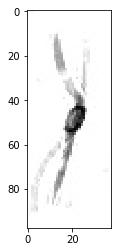

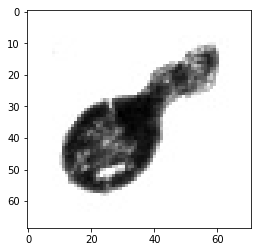

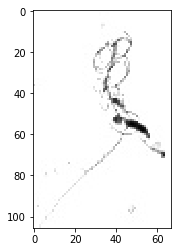

In [2]:
%matplotlib inline
from IPython import display

'''Christian, just replace make another row of your path 
   where you will unzip the folders and when you push to github
   comment it Like I did'''

path = '/home/aris/Desktop/Data/train_data/0/'

for count,filename in enumerate(os.listdir(path)):
    
    
    plt.figure()
    img=mpimg.imread(path+filename)
    plt.imshow(img, cmap='gray')

    #shows only the first three images and after breaks the loop.
    if count ==2:
            break
    
    

In [4]:
z = zipfile.ZipFile('train_images.zip')
print("Train set contains "+str(len(z.namelist()))+' images.')

labels_train = pd.read_csv('train_onelabel.csv')
labels_train.tail()


Train set contains 24205 images.


,image,class
24199,39201.jpg,120
24200,125944.jpg,120
24201,89209.jpg,120
24202,94023.jpg,120
24203,56829.jpg,120


In [5]:
#how many images per class are in the training dataset
images_per_class = labels_train.groupby('class').count()
images_per_class.head()

,image
class,
0,322
1,140
2,90
3,709
4,103


# Prepare Dataset

In [6]:
train_df = pd.read_csv('./train_onelabel.csv')
train_images_paths = ['./train_images/' + p for p in train_df.image]
train_labels = train_df['class'].values
# test_images_paths = sorted(glob(path to the test data))

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [9]:
train_images = (load_img(p, target_size=(32, 32)) for p in train_images_paths)
train_images = [img_to_array(img)[:, :, [0]] for img in train_images]
train_images = np.array(train_images)
train_images.shape

(24204, 32, 32, 1)

In [10]:
train_labels = to_categorical(train_labels)
x_train, x_val, y_train,  y_val = train_test_split(train_images, train_labels, test_size=0.2)

# CNN Example

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
# Initialising the CNN
classifier = Sequential()

In [15]:
# Step 1 - Convolution ---TODO: see input specification
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32,1),padding='same', activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adding a second convolutional layer+pooling layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu',, padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
#Step 4 - Create a fully connected neural network
'''its good practise to pick a number of power of two-experimenting output_dim
128 hidden nodes in hidden layers-by experimenting'''
 

#output_dim = number of nodes in the hidden layer
classifier.add(Dense(units= 128, activation = 'relu'))

#Dropout
classifier.add(Dropout(p = 0.1))

#second hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

#Dropout
#classifier.add(Dropout(p = 0.2))

#output layer
classifier.add(Dense(units = 121, activation = 'softmax')) #We have 121 categories of plankton!!


In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training Model

In [ ]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
flow = generator.flow(x_train, y_train, batch_size=batch_size)

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('dataset/training_set',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary',
#                                                  color_mode = 'grayscale')

# test_set = test_datagen.flow_from_directory('dataset/test_set',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary',
#                                             color_mode = 'grayscale')


# you have to change steps_per_epoch = (8000/32) and validation_steps = (2000/32)
# classifier.fit_generator(training_set,
#                          steps_per_epoch = (12000/32),
#                          epochs = 25,
#                          validation_data = test_set,
#                          validation_steps = (3000/32))

'''Keep it simple for trying different things. One image per 10 and only two epochs'''
history = classifier.fit_generator(flow,
                         steps_per_epoch = (len(x_train)/ batch_size),
                         epochs = 25,
                         validation_data =[x_val, y_val)

# Plot  Training vs Validation loss

In [ ]:
plt.plot(history.history['loss'], label='train loss', lw=3)
plt.plot(history.history['val_loss'], label='val loss', lw=3)
plt.grid()
plt.legend(loc=0)
plt.show()

# Save Model

In [ ]:
# from keras.models import model_from_json

# # serialize model to JSON
# best_model_classification_json = classifier.to_json()
# with open("best_model_3.json", "w") as json_file:
#     json_file.write(best_model_classification_json)
# # serialize weights to HDF5
# classifier.save_weights("model_best.h5")
# print("Saved model to disk")

# Load Model

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('best_model_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("model_best.h5")
print("Loaded model from disk")

# Make predictions

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from collections import OrderedDict

def find_category(path):
    
    test_image = image.load_img(path, target_size = (32, 32),grayscale = True)
    test_image = image.img_to_array(test_image)
  
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    
    training_set.class_indices
    
    
    category = int(np.where(result[0]!=0)[0][0])
    return category
    

images = []
categories = []
path = 'test_images/'

for count,i in enumerate(os.listdir(path)):
    
    images.append(str(i)) #save image name
    
    image_path = path+str(i)

    category = find_category(image_path)
    
    categories.append(category) #saves the category of the image
    

In [ ]:
#Create Final csv for the competition
csv_list =  pd.DataFrame( OrderedDict( { 'image': pd.Series(images), 'class': pd.Series(categories) } ) )
csv_list.to_csv('sample.csv',index=False)